In [41]:
! pip3 install pandas
! pip3 install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
ProbandDf = pd.read_csv("proband_probid.csv")
print(ProbandDf.head(5))

   proband_id    BMI  Gender  Weight (kg)    Age  Height (m)  \
0           1  24.87    Male        65.27  34.91        1.62   
1           2  23.48  Female        56.41  23.37        1.55   
2           3  21.15  Female        58.98  33.20        1.67   
3           4  32.45  Female        93.78  38.69        1.70   
4           5  14.83    Male        52.42  45.09        1.88   

   Workout_Frequency (days/week)  
0                           3.99  
1                           4.00  
2                           2.99  
3                           3.99  
4                           4.00  


In [67]:
WorkoutDf = pd.read_csv("workout_probid.csv")
print(WorkoutDf.head(5))

   proband_id Workout_Type  Calories_Burned  Session_Duration (hours)
0           1     Strength          1080.90                      1.00
1           2         HIIT          1809.91                      1.37
2           3       Cardio           802.26                      0.91
3           4         HIIT          1450.79                      1.10
4           5     Strength          1166.40                      1.08


In [68]:
NutritionDf = pd.read_csv("nutrition_probid.csv")
print(NutritionDf.head(5))

   proband_id  Calories  Daily meals frequency  Water_Intake (liters)
0           1    1806.0                   2.99                   1.50
1           2    1577.0                   3.01                   1.90
2           3    1608.0                   1.99                   1.88
3           4    2657.0                   3.00                   2.50
4           5    1470.0                   3.00                   2.91


In [69]:
PWDf = pd.merge(left = ProbandDf, right = WorkoutDf, on = "proband_id")
print(PWDf.head(5))

   proband_id    BMI  Gender  Weight (kg)    Age  Height (m)  \
0           1  24.87    Male        65.27  34.91        1.62   
1           2  23.48  Female        56.41  23.37        1.55   
2           3  21.15  Female        58.98  33.20        1.67   
3           4  32.45  Female        93.78  38.69        1.70   
4           5  14.83    Male        52.42  45.09        1.88   

   Workout_Frequency (days/week) Workout_Type  Calories_Burned  \
0                           3.99     Strength          1080.90   
1                           4.00         HIIT          1809.91   
2                           2.99       Cardio           802.26   
3                           3.99         HIIT          1450.79   
4                           4.00     Strength          1166.40   

   Session_Duration (hours)  
0                      1.00  
1                      1.37  
2                      0.91  
3                      1.10  
4                      1.08  


In [9]:
PWNDf = pd.merge(left = PWDf, right = NutritionDf, on = "proband_id")
print(PWNDf.head(5))

   proband_id    BMI  Gender  Weight (kg)    Age  Height (m)  \
0           1  24.87    Male        65.27  34.91        1.62   
1           2  23.48  Female        56.41  23.37        1.55   
2           3  21.15  Female        58.98  33.20        1.67   
3           4  32.45  Female        93.78  38.69        1.70   
4           5  14.83    Male        52.42  45.09        1.88   

   Workout_Frequency (days/week) Workout_Type  Calories_Burned  \
0                           3.99     Strength          1080.90   
1                           4.00         HIIT          1809.91   
2                           2.99       Cardio           802.26   
3                           3.99         HIIT          1450.79   
4                           4.00     Strength          1166.40   

   Session_Duration (hours)  Calories  Daily meals frequency  \
0                      1.00    1806.0                   2.99   
1                      1.37    1577.0                   3.01   
2                      0.9

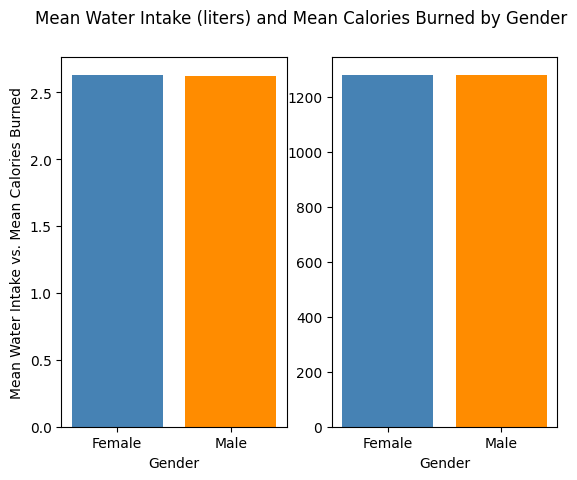

In [70]:
#Water intake, calories burned and gender

PWNDf.groupby("Gender")["Daily meals frequency"].mean()

wim = PWNDf.groupby("Gender")["Water_Intake (liters)"].mean()

cbm = PWNDf.groupby("Gender")["Calories_Burned"].mean()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Mean Water Intake (liters) and Mean Calories Burned by Gender")

ax1.bar(wim.index, wim.values, color = ["steelblue", "darkorange"])
ax1.set_xlabel("Gender")
ax1.set_ylabel("Mean Water Intake vs. Mean Calories Burned")

ax2.bar(cbm.index, cbm.values, color = ["steelblue", "darkorange"])
ax2.set_xlabel("Gender")

plt.savefig("water_intake_vs_calories_burned_by_gender.pdf")
plt.show()

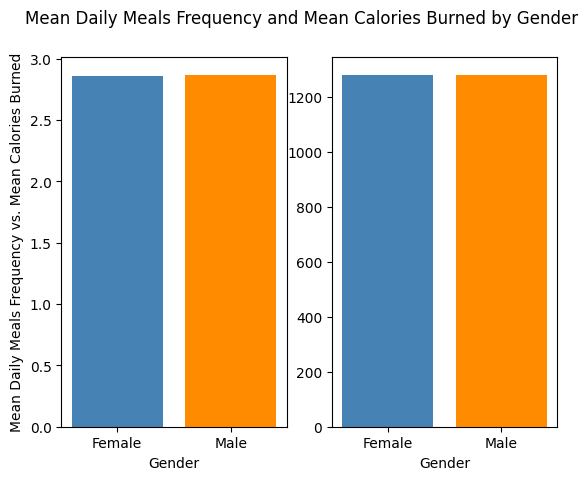

In [64]:
#Daily meals frequency, calories burned and gender

PWNDf.groupby("Gender")["Daily meals frequency"].mean()

dmfm = PWNDf.groupby("Gender")["Daily meals frequency"].mean()

cbm = PWNDf.groupby("Gender")["Calories_Burned"].mean()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean Daily Meals Frequency and Mean Calories Burned by Gender')

ax1.bar(dmfm.index, dmfm.values, color = ["steelblue", "darkorange"])
ax1.set_xlabel("Gender")
ax1.set_ylabel("Mean Daily Meals Frequency vs. Mean Calories Burned")

ax2.bar(cbm.index, cbm.values, color = ["steelblue", "darkorange"])
ax2.set_xlabel("Gender")

plt.savefig("daily_meals_frequency_vs_calories_burned_by_gender.pdf")
plt.show()